In [2]:
import pandas as pd

data=pd.read_csv('Ecommerce_Sales_Prediction_Dataset.csv')
data.head()

#Customer_Segment 定期的、臨時、その他
#Marketing_Spend 販売に割り当てられたマーケティング予算
#Units_Sold　販売数

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [3]:
# check
data.isnull().sum()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


In [4]:
data.fillna(0, inplace=True)
#欠損地なし

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

category_sales = data.groupby('Product_Category')['Price'].sum().sort_values(ascending=False)

category_sales.head()

Product_Category
Sports         108389.97
Electronics    102581.19
Toys           101485.83
Fashion         99267.55
Home Decor      93517.38
Name: Price, dtype: float64

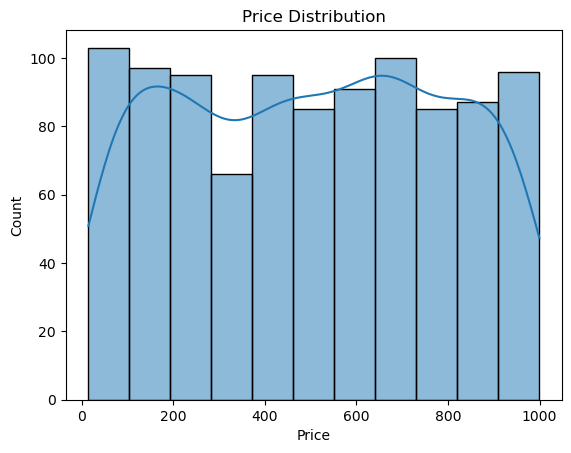

In [6]:
#ヒストグラムの描写
sns.histplot(data['Price'],kde=True)
plt.title('Price Distribution')
plt.show()

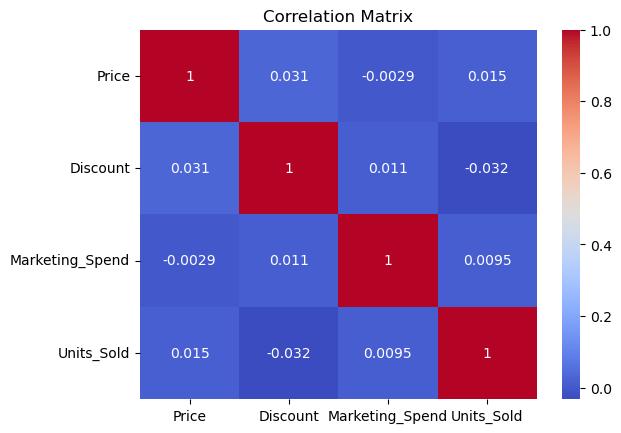

In [47]:
#相関行列の可視化
numeric_df = data.select_dtypes(include=['int64', 'float64'])

corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
#日付部分の分解
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

data['Price_MA'] = data['Price'].rolling(window=7).mean() 

data.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Year,Month,Day,Price_MA
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,2023,1,1,NaN
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,2023,1,2,NaN
2,2023-01-03,Home Decor,699.68,3.56,Premium,3793.91,27,2023,1,3,NaN
3,2023-01-04,Toys,923.27,0.61,Premium,9422.75,29,2023,1,4,NaN
4,2023-01-05,Toys,710.17,47.83,Premium,1756.83,17,2023,1,5,NaN


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 特徴量とターゲットの分割
X = data.drop(columns=['Price']).select_dtypes(include='number')
y = data['Price']

# データの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# モデルの学習
model = RandomForestRegressor()
model.fit(X_train, y_train)

# 予測と評価
y_pred = model.predict(X_test)
#rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 281.68997313956874


In [12]:
from sklearn.model_selection import GridSearchCV

# ハイパーパラメータの設定
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
}

# グリッドサーチ
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=3)
grid_search.fit(X_train, y_train)

# 最適なパラメータ
print(f'Best Parameters: {grid_search.best_params_}')


Best Parameters: {'max_depth': 10, 'n_estimators': 100}
